!pip install folium==0.5.0
!pip install geopy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer
sns.set()

In [2]:
address = 'Brasília, DF'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brasília are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brasília are -15.7934036, -47.8823172.


In [3]:
states = ['Rio Branco, AC',
'Maceió, AL',
'Macapá, AP',
'Manaus, AM',
'Salvador, BA',
'Fortaleza, CE',
'Brasília, DF',
'Vitória, ES',
'Goiânia, GO',
'São Luís, MA',
'Cuiabá, MT',
'Campo Grande, MS',
'Belo Horizonte, MG',
'Belém, PA',
'João Pessoa, PB',
'Curitiba, PR',
'Recife, PE',
'Teresina, PI',
'Rio de Janeiro, RJ',
'Natal, RN',
'Porto Alegre, RS',
'Porto Velho, RO',
'Boa Vista, RR',
'Florianópolis, SC',
'São Paulo, SP',
'Aracaju, SE',
'Palmas, TO']

In [4]:
locations = []
for i in states:
    if i == 'Manaus, AM':
        latitude=-3.07153
        longitude=-60.02332
        locations.append((i,latitude,longitude))
    else:
        address = i
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        locations.append((i,latitude,longitude))
print(locations)

[('Rio Branco, AC', -9.9765362, -67.8220778), ('Maceió, AL', -9.6476843, -35.7339264), ('Macapá, AP', 0.0401529, -51.0569588), ('Manaus, AM', -3.07153, -60.02332), ('Salvador, BA', -12.9822499, -38.4812772), ('Fortaleza, CE', -3.7304512, -38.5217989), ('Brasília, DF', -15.7934036, -47.8823172), ('Vitória, ES', -20.3200917, -40.3376682), ('Goiânia, GO', -16.680882, -49.2532691), ('São Luís, MA', -2.5295265, -44.2963942), ('Cuiabá, MT', -15.5986686, -56.0991301), ('Campo Grande, MS', -20.4640173, -54.6162947), ('Belo Horizonte, MG', -19.9227318, -43.9450948), ('Belém, PA', -1.45056, -48.4682453), ('João Pessoa, PB', -7.1215981, -34.882028), ('Curitiba, PR', -25.4295963, -49.2712724), ('Recife, PE', -8.0584933, -34.8848193), ('Teresina, PI', -5.0896403, -42.809588), ('Rio de Janeiro, RJ', -22.9110137, -43.2093727), ('Natal, RN', -5.805398, -35.2080905), ('Porto Alegre, RS', -30.0324999, -51.2303767), ('Porto Velho, RO', -8.7494525, -63.8735438), ('Boa Vista, RR', 2.8208478, -60.6719582), 

In [5]:
df = pd.DataFrame(locations,columns=['city','latitude','longitude'])

In [6]:
df.head()

,city,latitude,longitude
0,"Rio Branco, AC",-9.976536,-67.822078
1,"Maceió, AL",-9.647684,-35.733926
2,"Macapá, AP",0.040153,-51.056959
3,"Manaus, AM",-3.071530,-60.023320
4,"Salvador, BA",-12.982250,-38.481277


In [7]:
map_brasil = folium.Map(location=[-15.7754462, -47.7970891], zoom_start=5)

for lat, lng, label in zip(df['latitude'], df['longitude'], df['city']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brasil)  
    
map_brasil

In [8]:
with open("Chave.txt") as myfile:
    auth = myfile.readline()

# Test
def getNearbyVenues(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        import requests
            
        url = 'https://api.foursquare.com/v2/venues/explore?categoryId=4d4b7105d754a06374d81259&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']

        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city', 
                  'city Latitude', 
                  'city Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Test
def getNearbyVenues(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']

        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city', 
                  'city Latitude', 
                  'city Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
# Test
with open("Chave.txt") as myfile:
    auth = myfile.readline()

url = "https://api.foursquare.com/v3/places/search?ll=-9.976536%2C-67.822078&radius=50000&categories=13000&open_now=true&limit=50&session_token=a"

headers = {
    "Accept": "application/json",
    "Authorization": auth
}

response = requests.request("GET", url, headers=headers).json()["results"]
response

[{'fsq_id': '4de3fd1b8877bcb686694aaf',
  'categories': [{'id': 13002,
    'name': 'Bakery',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
     'suffix': '.png'}},
   {'id': 13065,
    'name': 'Restaurant',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
     'suffix': '.png'}}],
  'chains': [],
  'distance': 2148,
  'geocodes': {'main': {'latitude': -9.964662, 'longitude': -67.806895}},
  'link': '/v3/places/4de3fd1b8877bcb686694aaf',
  'location': {'address': 'Rua Raul Barcelar, 130',
   'country': 'BR',
   'formatted_address': 'Rua Raul Barcelar, 130, Rio Branco, AC, 69909-220',
   'locality': 'Rio Branco',
   'post_town': 'Aviário',
   'postcode': '69909-220',
   'region': 'AC'},
  'name': 'Chalé do Trigo Pães e Doces',
  'related_places': {},
  'timezone': 'America/Rio_Branco'},
 {'fsq_id': '4efd34d78231bcb701581635',
  'categories': [{'id': 13309,
    'name': 'Middle Eastern Restaurant',
    'icon': {'prefix': 'https:

In [19]:
for j in response:
    print(j['categories'])
    print(j['name'])

[{'id': 13002, 'name': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}}, {'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}]
Chalé do Trigo Pães e Doces
[{'id': 13309, 'name': 'Middle Eastern Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_', 'suffix': '.png'}}]
Jarude
[{'id': 13026, 'name': 'BBQ Joint', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_', 'suffix': '.png'}}]
Churrascaria Sabor do Sul III
[{'id': 13079, 'name': 'Brazilian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/argentinian_', 'suffix': '.png'}}]
J B Grill Festas e Eventos
[{'id': 13145, 'name': 'Fast Food Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_', 'suffix': '.png'}}, {'id': 13039, 'name': 'Deli', 'icon': {'prefix': 'https://ss3.4sqi.net/img/cat

In [13]:
for i in response[0]['categories']:
    print(i['name'])

Bakery
Restaurant


In [21]:
for j in response:
    for i in j['categories']:
        print(i['name'])
    print(j['name'])

Bakery
Restaurant
Chalé do Trigo Pães e Doces
Middle Eastern Restaurant
Jarude
BBQ Joint
Churrascaria Sabor do Sul III
Brazilian Restaurant
J B Grill Festas e Eventos
Fast Food Restaurant
Deli
Subway
Brazilian Restaurant
Fogão Mineiro Restaurante
Churrascaria
Bisteca Restaurante
Food Court
Praça de Alimentação
Peruvian Restaurant
Cuzco Restaurante
Brazilian Restaurant
Restaurante Mata Nativa
Ice Cream Parlor
Restaurant
Sorveteria Boneco de Neve
Bar
Brazilian Restaurant
Bon'Aparte
Brazilian Restaurant
Restaurante Esquina Verde
BBQ Joint
Steakhouse
Churrascaria Du Cheffão
BBQ Joint
Churrascaria Sabor do Sul
Snack Place
Mister Paulo Hamburguer's
Fast Food Restaurant
Burger Joint
Burger King
BBQ Joint
Churrascaria Sabor do Sul II
Brazilian Restaurant
Pesqueiro e Restaurante Manto Verde
Pastry Shop
Restaurant
Josefina Confeitaria
Restaurant
Sabor de Sul
Deli
Emporio Paulista
Brazilian Restaurant
Churrascaria Sabor do Sul
Coffee Shop
Restaurant
Cafe Mustache
Restaurant
Tardezinha Grill & Fis

In [25]:
[i['name'] for j in response for i in j['categories']]

['Bakery',
 'Restaurant',
 'Middle Eastern Restaurant',
 'BBQ Joint',
 'Brazilian Restaurant',
 'Fast Food Restaurant',
 'Deli',
 'Brazilian Restaurant',
 'Churrascaria',
 'Food Court',
 'Peruvian Restaurant',
 'Brazilian Restaurant',
 'Ice Cream Parlor',
 'Restaurant',
 'Bar',
 'Brazilian Restaurant',
 'Brazilian Restaurant',
 'BBQ Joint',
 'Steakhouse',
 'BBQ Joint',
 'Snack Place',
 'Fast Food Restaurant',
 'Burger Joint',
 'BBQ Joint',
 'Brazilian Restaurant',
 'Pastry Shop',
 'Restaurant',
 'Restaurant',
 'Deli',
 'Brazilian Restaurant',
 'Coffee Shop',
 'Restaurant',
 'Restaurant']

In [24]:
[(i['name'],j['name']) for j in response for i in j['categories']]

[('Bakery', 'Chalé do Trigo Pães e Doces'),
 ('Restaurant', 'Chalé do Trigo Pães e Doces'),
 ('Middle Eastern Restaurant', 'Jarude'),
 ('BBQ Joint', 'Churrascaria Sabor do Sul III'),
 ('Brazilian Restaurant', 'J B Grill Festas e Eventos'),
 ('Fast Food Restaurant', 'Subway'),
 ('Deli', 'Subway'),
 ('Brazilian Restaurant', 'Fogão Mineiro Restaurante'),
 ('Churrascaria', 'Bisteca Restaurante'),
 ('Food Court', 'Praça de Alimentação'),
 ('Peruvian Restaurant', 'Cuzco Restaurante'),
 ('Brazilian Restaurant', 'Restaurante Mata Nativa'),
 ('Ice Cream Parlor', 'Sorveteria Boneco de Neve'),
 ('Restaurant', 'Sorveteria Boneco de Neve'),
 ('Bar', "Bon'Aparte"),
 ('Brazilian Restaurant', "Bon'Aparte"),
 ('Brazilian Restaurant', 'Restaurante Esquina Verde'),
 ('BBQ Joint', 'Churrascaria Du Cheffão'),
 ('Steakhouse', 'Churrascaria Du Cheffão'),
 ('BBQ Joint', 'Churrascaria Sabor do Sul'),
 ('Snack Place', "Mister Paulo Hamburguer's"),
 ('Fast Food Restaurant', 'Burger King'),
 ('Burger Joint', 'Bur

In [28]:
[(j['name'],[i['name'] for i in  j['categories']]) for j in response]

[('Chalé do Trigo Pães e Doces', ['Bakery', 'Restaurant']),
 ('Jarude', ['Middle Eastern Restaurant']),
 ('Churrascaria Sabor do Sul III', ['BBQ Joint']),
 ('J B Grill Festas e Eventos', ['Brazilian Restaurant']),
 ('Subway', ['Fast Food Restaurant', 'Deli']),
 ('Fogão Mineiro Restaurante', ['Brazilian Restaurant']),
 ('Bisteca Restaurante', ['Churrascaria']),
 ('Praça de Alimentação', ['Food Court']),
 ('Cuzco Restaurante', ['Peruvian Restaurant']),
 ('Restaurante Mata Nativa', ['Brazilian Restaurant']),
 ('Sorveteria Boneco de Neve', ['Ice Cream Parlor', 'Restaurant']),
 ("Bon'Aparte", ['Bar', 'Brazilian Restaurant']),
 ('Restaurante Esquina Verde', ['Brazilian Restaurant']),
 ('Churrascaria Du Cheffão', ['BBQ Joint', 'Steakhouse']),
 ('Churrascaria Sabor do Sul', ['BBQ Joint']),
 ("Mister Paulo Hamburguer's", ['Snack Place']),
 ('Burger King', ['Fast Food Restaurant', 'Burger Joint']),
 ('Churrascaria Sabor do Sul II', ['BBQ Joint']),
 ('Pesqueiro e Restaurante Manto Verde', ['Brazi

In [65]:
def getNearbyPlaces(names, latitudes, longitudes, radius=50000, LIMIT=50):
    
    places_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        import requests
            
        url = "https://api.foursquare.com/v3/places/search?ll={}%2C{}&radius={}&categories=13000&open_now=true&limit={}".format(
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        headers = {
        "Accept": "application/json",
        "Authorization": auth
        }
           
        response = requests.request("GET", url, headers=headers).json()["results"]

        places_list.append([(
            name, 
            lat, 
            lng, 
            p['name'],
            p['location']['formatted_address'],
            [q['name'] for q in  p['categories']]) for p in response])

    nearby_places = pd.DataFrame([item for places_list in places_list for item in places_list])
    nearby_places.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Place', 
                  'Place Adress', 
                  'Place Category']
    
    return(nearby_places)

In [32]:
capital_places = getNearbyPlaces(names=df['city'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

Rio Branco, AC
Maceió, AL
Macapá, AP
Manaus, AM
Salvador, BA
Fortaleza, CE
Brasília, DF
Vitória, ES
Goiânia, GO
São Luís, MA
Cuiabá, MT
Campo Grande, MS
Belo Horizonte, MG
Belém, PA
João Pessoa, PB
Curitiba, PR
Recife, PE
Teresina, PI
Rio de Janeiro, RJ
Natal, RN
Porto Alegre, RS
Porto Velho, RO
Boa Vista, RR
Florianópolis, SC
São Paulo, SP
Aracaju, SE
Palmas, TO


In [33]:
capital_places.head()

,City,City Latitude,City Longitude,Place,Place Adress,Place Category
0,"Rio Branco, AC",-9.976536,-67.822078,Chalé do Trigo Pães e Doces,"Rua Raul Barcelar, 130, Rio Branco, AC, 69909-220","[Bakery, Restaurant]"
1,"Rio Branco, AC",-9.976536,-67.822078,Jarude,"Travessa Martiniano Prado, 88 (R. Amazonas), R...",[Middle Eastern Restaurant]
2,"Rio Branco, AC",-9.976536,-67.822078,Churrascaria Sabor do Sul III,"Parque da Maternidade, S/N, Rio Branco, AC, 69...",[BBQ Joint]
3,"Rio Branco, AC",-9.976536,-67.822078,J B Grill Festas e Eventos,"Via Chico Mendes, 528, Rio Branco, AC, 69906-210",[Brazilian Restaurant]
4,"Rio Branco, AC",-9.976536,-67.822078,Subway,"Avenida Nacoes Unidas, 480, Rio Branco, AC, 69...","[Fast Food Restaurant, Deli]"


# old code

capital_onehot = pd.get_dummies(capital_places[['Place Category']], prefix="", prefix_sep="")

capital_onehot['City'] = capital_places['City'] 

fixed_columns = [capital_onehot.columns[-1]] + list(capital_onehot.columns[:-1])
capital_onehot = capital_onehot[fixed_columns]

capital_onehot.head()

In [42]:
s = capital_places['Place Category']

mlb = MultiLabelBinarizer()

capital_label = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=capital_places.index)

capital_label['City'] = capital_places['City']

capital_label.insert(0, 'City', capital_label.pop('City'))

capital_label.head()

,City,Acai House,American Restaurant,Argentinian Restaurant,Arts and Entertainment,Asian Restaurant,BBQ Joint,Baiano Restaurant,Bakery,Bar,...,Sports Bar,Steakhouse,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Theater,Theme Restaurant,Vegan and Vegetarian Restaurant,Wine Bar,Winery
0,"Rio Branco, AC",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"Rio Branco, AC",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Rio Branco, AC",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Rio Branco, AC",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Rio Branco, AC",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
capital_grouped = capital_label.groupby('City').mean().reset_index()
capital_grouped.head(20)

,City,Acai House,American Restaurant,Argentinian Restaurant,Arts and Entertainment,Asian Restaurant,BBQ Joint,Baiano Restaurant,Bakery,Bar,...,Sports Bar,Steakhouse,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Theater,Theme Restaurant,Vegan and Vegetarian Restaurant,Wine Bar,Winery
0,"Aracaju, SE",0.000000,0.00,0.02,0.00,0.0,0.040000,0.00,0.100000,0.060000,...,0.00,0.040000,0.020000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.00
1,"Belo Horizonte, MG",0.020000,0.00,0.02,0.00,0.0,0.060000,0.00,0.240000,0.220000,...,0.00,0.040000,0.000000,0.0,0.0,0.0,0.00,0.020000,0.020000,0.02
2,"Belém, PA",0.040000,0.00,0.00,0.06,0.0,0.040000,0.00,0.100000,0.060000,...,0.00,0.060000,0.020000,0.0,0.0,0.0,0.00,0.000000,0.020000,0.02
3,"Boa Vista, RR",0.050000,0.00,0.00,0.00,0.0,0.200000,0.00,0.050000,0.000000,...,0.00,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.00
4,"Brasília, DF",0.000000,0.00,0.02,0.00,0.0,0.000000,0.00,0.160000,0.120000,...,0.00,0.060000,0.020000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.02
5,"Campo Grande, MS",0.020000,0.00,0.00,0.00,0.0,0.040000,0.00,0.180000,0.020000,...,0.00,0.060000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.020000,0.02
6,"Cuiabá, MT",0.000000,0.00,0.00,0.00,0.0,0.040000,0.00,0.160000,0.020000,...,0.00,0.060000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.020000,0.02
7,"Curitiba, PR",0.000000,0.02,0.00,0.00,0.0,0.000000,0.00,0.400000,0.020000,...,0.00,0.040000,0.000000,0.0,0.0,0.0,0.02,0.020000,0.000000,0.00
8,"Florianópolis, SC",0.000000,0.00,0.00,0.00,0.0,0.020000,0.00,0.120000,0.160000,...,0.00,0.020000,0.000000,0.0,0.0,0.0,0.00,0.020000,0.000000,0.00
9,"Fortaleza, CE",0.000000,0.02,0.00,0.00,0.0,0.100000,0.00,0.140000,0.040000,...,0.00,0.100000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.00


In [45]:
num_top_venues = 5

for hood in capital_grouped['City']:
    print("----"+hood+"----")
    temp = capital_grouped[capital_grouped['City'] == hood].T.reset_index()
    temp.columns = ['place','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aracaju, SE----
                  place  freq
0            Restaurant  0.18
1  Fast Food Restaurant  0.14
2  Brazilian Restaurant  0.14
3          Burger Joint  0.12
4    Seafood Restaurant  0.12


----Belo Horizonte, MG----
                  place  freq
0            Restaurant  0.46
1                Bakery  0.24
2                   Bar  0.22
3  Brazilian Restaurant  0.16
4  Fast Food Restaurant  0.10


----Belém, PA----
                  place  freq
0            Restaurant  0.24
1  Brazilian Restaurant  0.20
2                Bakery  0.10
3      Ice Cream Parlor  0.08
4              Pizzeria  0.08


----Boa Vista, RR----
                  place  freq
0            Restaurant  0.30
1             BBQ Joint  0.20
2  Fast Food Restaurant  0.15
3              Pizzeria  0.10
4          Churrascaria  0.10


----Brasília, DF----
                place  freq
0          Restaurant  0.30
1              Bakery  0.16
2                 Bar  0.12
3  Seafood Restaurant  0.10
4                Café  0

In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = capital_grouped['City']

for ind in np.arange(capital_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(capital_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aracaju, SE",Restaurant,Fast Food Restaurant,Brazilian Restaurant,Burger Joint,Seafood Restaurant,Bakery,Ice Cream Parlor,Northeastern Brazilian Restaurant,Deli,Bar
1,"Belo Horizonte, MG",Restaurant,Bakery,Bar,Brazilian Restaurant,Fast Food Restaurant,Café,Pizzeria,BBQ Joint,Churrascaria,Ice Cream Parlor
2,"Belém, PA",Restaurant,Brazilian Restaurant,Bakery,Ice Cream Parlor,Pizzeria,Fast Food Restaurant,Steakhouse,Arts and Entertainment,Bar,Italian Restaurant
3,"Boa Vista, RR",Restaurant,BBQ Joint,Fast Food Restaurant,Pizzeria,Churrascaria,Acai House,Buffet,Seafood Restaurant,Sandwich Restaurant,Mexican Restaurant
4,"Brasília, DF",Restaurant,Bakery,Bar,Seafood Restaurant,Café,Brazilian Restaurant,Steakhouse,Pizzeria,French Restaurant,Fast Food Restaurant


In [49]:
city_venues_sorted.set_index('City',inplace=True)

In [50]:
city_venues_sorted.head(27)

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
City,,,,,,,,,,
"Aracaju, SE",Restaurant,Fast Food Restaurant,Brazilian Restaurant,Burger Joint,Seafood Restaurant,Bakery,Ice Cream Parlor,Northeastern Brazilian Restaurant,Deli,Bar
"Belo Horizonte, MG",Restaurant,Bakery,Bar,Brazilian Restaurant,Fast Food Restaurant,Café,Pizzeria,BBQ Joint,Churrascaria,Ice Cream Parlor
"Belém, PA",Restaurant,Brazilian Restaurant,Bakery,Ice Cream Parlor,Pizzeria,Fast Food Restaurant,Steakhouse,Arts and Entertainment,Bar,Italian Restaurant
"Boa Vista, RR",Restaurant,BBQ Joint,Fast Food Restaurant,Pizzeria,Churrascaria,Acai House,Buffet,Seafood Restaurant,Sandwich Restaurant,Mexican Restaurant
"Brasília, DF",Restaurant,Bakery,Bar,Seafood Restaurant,Café,Brazilian Restaurant,Steakhouse,Pizzeria,French Restaurant,Fast Food Restaurant
"Campo Grande, MS",Restaurant,Bakery,Fast Food Restaurant,Ice Cream Parlor,Burger Joint,Buffet,Café,Churrascaria,Deli,Steakhouse
"Cuiabá, MT",Restaurant,Brazilian Restaurant,Bakery,Fast Food Restaurant,Ice Cream Parlor,Deli,Churrascaria,Steakhouse,BBQ Joint,Italian Restaurant
"Curitiba, PR",Restaurant,Bakery,Coffee Shop,Brazilian Restaurant,Café,Italian Restaurant,Burger Joint,Fast Food Restaurant,Churrascaria,Middle Eastern Restaurant
"Florianópolis, SC",Seafood Restaurant,Restaurant,Bar,Café,Bakery,Buffet,Night Club,Italian Restaurant,Coffee Shop,Brazilian Restaurant


<AxesSubplot:>

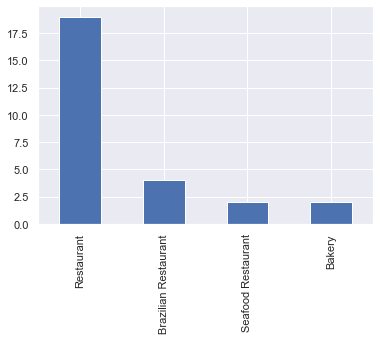

In [51]:
city_venues_sorted['1st Most Common Venue'].value_counts().plot.bar()

<AxesSubplot:>

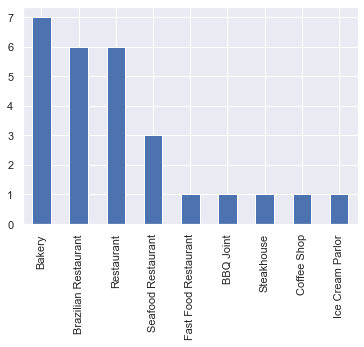

In [52]:
city_venues_sorted['2nd Most Common Venue'].value_counts().plot.bar()

<AxesSubplot:>

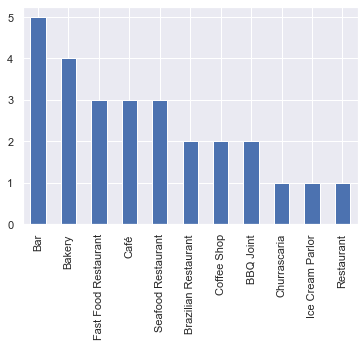

In [53]:
city_venues_sorted['3rd Most Common Venue'].value_counts().plot.bar()

In [54]:
city_venues_sorted.describe()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,27,27,27,27,27,27,27,27,27,27
unique,4,9,11,13,13,15,18,22,20,18
top,Restaurant,Bakery,Bar,Fast Food Restaurant,Café,Café,Ice Cream Parlor,Steakhouse,Steakhouse,Italian Restaurant
freq,19,7,5,6,5,4,3,3,3,4


In [55]:
import ipywidgets as widgets

In [56]:
[city_venues_sorted[i].unique().tolist() for i in city_venues_sorted.columns]

[['Restaurant', 'Seafood Restaurant', 'Bakery', 'Brazilian Restaurant'],
 ['Fast Food Restaurant',
  'Bakery',
  'Brazilian Restaurant',
  'BBQ Joint',
  'Restaurant',
  'Seafood Restaurant',
  'Steakhouse',
  'Coffee Shop',
  'Ice Cream Parlor'],
 ['Brazilian Restaurant',
  'Bar',
  'Bakery',
  'Fast Food Restaurant',
  'Coffee Shop',
  'Churrascaria',
  'Café',
  'Ice Cream Parlor',
  'Seafood Restaurant',
  'Restaurant',
  'BBQ Joint'],
 ['Burger Joint',
  'Brazilian Restaurant',
  'Ice Cream Parlor',
  'Pizzeria',
  'Seafood Restaurant',
  'Fast Food Restaurant',
  'Café',
  'Bakery',
  'Gastropub',
  'Deli',
  'Restaurant',
  'Baiano Restaurant',
  'Bar'],
 ['Seafood Restaurant',
  'Fast Food Restaurant',
  'Pizzeria',
  'Churrascaria',
  'Café',
  'Burger Joint',
  'Ice Cream Parlor',
  'Bakery',
  'Brazilian Restaurant',
  'Deli',
  'Fish and Chips Shop',
  'Acai House',
  'Northeastern Brazilian Restaurant'],
 ['Bakery',
  'Café',
  'Fast Food Restaurant',
  'Acai House',
  'Br

In [57]:
rest = [city_venues_sorted[i].unique().tolist() for i in city_venues_sorted.columns]

In [58]:
restaurants = list(set([j for i in rest for j in i]))

In [59]:
restaurants

['American Restaurant',
 'Dive Bar',
 'Restaurant',
 'Modern European Restaurant',
 'Japanese Restaurant',
 'Food Court',
 'Churrascaria',
 'Pizzeria',
 'Fried Chicken Joint',
 'Fast Food Restaurant',
 'Mexican Restaurant',
 'Arts and Entertainment',
 'Bar',
 'Steakhouse',
 'Gastropub',
 'Fish and Chips Shop',
 'Italian Restaurant',
 'Sandwich Restaurant',
 'Acai House',
 'Night Club',
 'French Restaurant',
 'Bakery',
 'Bistro',
 'Diner',
 'Vegan and Vegetarian Restaurant',
 'Brazilian Restaurant',
 'Dessert Shop',
 'Middle Eastern Restaurant',
 'Coffee Shop',
 'Burger Joint',
 'Pastry Shop',
 'Seafood Restaurant',
 'Chinese Restaurant',
 'Peruvian Restaurant',
 'Deli',
 'Baiano Restaurant',
 'Ice Cream Parlor',
 'Café',
 'Dining and Drinking',
 'Cupcake Shop',
 'Northeastern Brazilian Restaurant',
 'Buffet',
 'BBQ Joint',
 'Wine Bar']

In [60]:
restaurants.append('NONE OF THE ABOVE')

In [61]:
c = widgets.Dropdown(
    options=states,
    description='Capital of choice:',
    disabled=False,
)

In [62]:
r = widgets.Dropdown(
    options=restaurants,
    description='Type of restaurant:',
    disabled=False,
)

## Slider to make the choice, in wich capital and waht type o restaurant

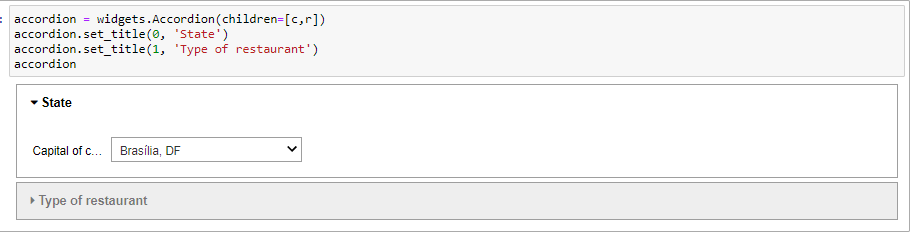

In [179]:
from IPython.display import Image
Image(filename='Screenshot_9.png') 

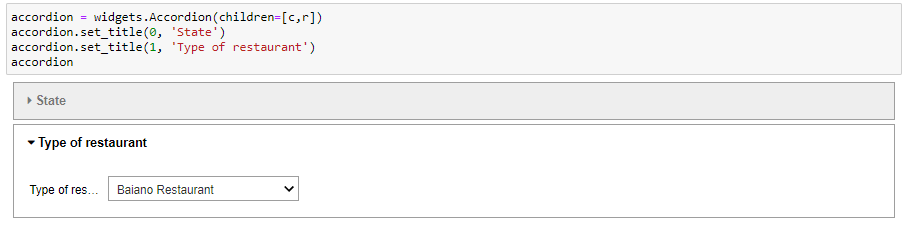

In [180]:
Image(filename='Screenshot_8.png')

In [63]:
accordion = widgets.Accordion(children=[c,r])
accordion.set_title(0, 'State')
accordion.set_title(1, 'Type of restaurant')
accordion

Accordion(children=(Dropdown(description='Capital of choice:', options=('Rio Branco, AC', 'Maceió, AL', 'Macap…

## Advice based around your choice

In [64]:
try:
    city_venues_sorted.loc[c.value].reset_index().set_index(c.value).loc[r.value]
except:
    print(f'{r.value} in {c.value}')
    print("it's not at the top 10.")
    print('\n')
    print("there's little to no supply, and little to no demand.")
    print('\n')
    print("So it's up to you to decide, maybe you shouldn't go there.")
else:
    result = city_venues_sorted.loc[c.value].reset_index().set_index(c.value).loc[r.value][0]
    if result in ['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue']:
        print(f'{r.value} in {c.value}')
        print('\n')
        print("One of the 3 most numerous restaurant type's on this capital.")
        print('\n')
        print(f'{result} on {c.value}.')
        print('\n')
        print('The higher number of venues of this type is a good estimate of the demand.')
        print('\n')
        print('Hight supply and demand.')
        print('\n')
        print("So it's to decide if you want to build there or not.")
    else:
        print(f'{r.value} in {c.value}')
        print('\n')
        print(result)
        print('\n')
        print('Go for it, the demand is high and the supply not so much.')
        print('\n')
        print('Nice place to expand to.')

Bar in Brasília, DF


One of the 3 most numerous restaurant type's on this capital.


3rd Most Common Venue on Brasília, DF.


The higher number of venues of this type is a good estimate of the demand.


Hight supply and demand.


So it's to decide if you want to build there or not.
